# Assignment 1-1: PyTorch 101

아래 있는 코드 셀은 jupyter notebook에서 import한 python 모듈을 수정한 경우 자동으로 반영되도록 합니다.<br>
만약 아래 코드를 실행하지 않는 경우 python 코드를 변경하면 jupyter notebook kernel을 restart해야합니다.<br>
참고: 아래 코드 셀 실행 시 에러가 나는 경우 notebook kernel을 재시작하세요.

In [2]:
%load_ext autoreload
%autoreload 2

# Introduction
이 notebook에서는 과제에서 사용할 PyTorch의 핵심 기능들을 다룹니다.
참고로 몇몇 notebook cell과 py 파일에는 아래와 같이 코드 블록이 있습니다.

```python
##########################################################################
#                     TODO: 여기에 코드를 작성하세요                           #
##########################################################################
pass
##########################################################################
#                            코드 끝                                       #
##########################################################################
```

여기서 pass 문을 직접 작성한 코드로 교체하고 나머지 블록은 그대로 두어야 합니다 (아래 예시와 같이 TODO 코드 블록 사이를 제외하고는 절대 다른 코드를 수정하면 안됩니다).

```python
##########################################################################
#                     TODO: 여기에 코드를 작성하세요                           #
##########################################################################
y = m * x + b
##########################################################################
#                            코드 끝                                       #
##########################################################################
```

Notebook을 작성할 때는 다음 규칙을 반드시 지켜야 합니다:
- 코드 블록 바깥의 코드를 수정하거나 작성하지 말 것
- 노트북의 셀을 추가하거나 삭제하지 말 것. 단, 연습용으로 새 셀을 추가할 수는 있으나 제출 전 삭제해야 함
- **제출 전에 모든 셀을 실행할 것. 실행된 코드만 점수로 인정됩니다.**

# PyTorch

PyTorch는 오픈 소스 머신러닝 프레임워크입니다.
PyTorch는 몇 가지 주요 기능을 제공합니다.
- 다차원 Tensor 객체: numpy와 유사하지만 GPU 가속 지원
- 최적화된 autograd 엔진: 자동으로 미분 계산 수행
- 모듈화된 API: 딥러닝 모델 구축 및 배포 지원

본 과제에서는 PyTorch 2.0 버전 이상이면 큰 무리 없이 동작합니다.

In [3]:
import torch
print(torch.__version__)

2.8.0+cpu


## Tensor 기초

### Creating and Accessing tensors

torch `tensor`는 같은 타입의 값들로 이루어진 다차원 배열입니다. index는 0 이상의 정수 tuple을 사용합니다.
차원의 개수는 rank, 각 차원의 크기를 담은 튜플은 shape라고 합니다.
<br>
torch `tensor`는 중첩된 Python 리스트로 만들 수 있고 대괄호를 이용해 element를 조회하거나 수정할 수 있습니다.

element를 꺼내면 PyTorch의 scalar 타입이 나오는데 필요하다면 .item() 메서드로 Python scalar로 변환할 수 있습니다.

In [4]:
# Create a rank 1 tensor from a Python list
a = torch.tensor([1, 2, 3])
print('Here is a:')
print(a)
print('type(a): ', type(a))
print('rank of a: ', a.dim())
print('a.shape: ', a.shape)

# Access elements using square brackets
print()
print('a[0]: ', a[0])
print('type(a[0]): ', type(a[0]))
print('type(a[0].item()): ', type(a[0].item()))

# Mutate elements using square brackets
a[1] = 10
print()
print('a after mutating:')
print(a)

Here is a:
tensor([1, 2, 3])
type(a):  <class 'torch.Tensor'>
rank of a:  1
a.shape:  torch.Size([3])

a[0]:  tensor(1)
type(a[0]):  <class 'torch.Tensor'>
type(a[0].item()):  <class 'int'>

a after mutating:
tensor([ 1, 10,  3])


위 예시는 1차원 tensor를 보여줍니다. 같은 방식으로 2차원 이상 tensor도 만들 수 있습니다.

In [5]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('rank of b:', b.dim())
print('b.shape: ', b.shape)

# Access elements from a multidimensional tensor
print()
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

# Mutate elements of a multidimensional tensor
b[1, 1] = 100
print()
print('b after mutating:')
print(b)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
rank of b: 2
b.shape:  torch.Size([2, 3])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


#### 직접 구현하기

이제는 직접 과제를 해볼 차례입니다.<br>
파일명 `pytorch101.py` 안에 있는 함수들 `create_sample_tensor`, `mutate_tensor`, `count_tensor_elements` 를 완성하세요.

In [11]:
from pytorch101 import create_sample_tensor, mutate_tensor, count_tensor_elements

# Create a sample tensor
x = create_sample_tensor()
print('Here is the sample tensor:')
print(x)

# Mutate the tensor by setting a few elements
indices = [(0, 0), (1, 0), (1, 1)]
values = [4, 5, 6]
mutate_tensor(x, indices, values)
print('\nAfter mutating:')
print(x)
print('\nCorrect shape: ', x.shape == (3, 2))
print('x[0, 0] correct: ', x[0, 0].item() == 4)
print('x[1, 0] correct: ', x[1, 0].item() == 5)
print('x[1, 1] correct: ', x[1, 1].item() == 6)

# Check the number of elements in the sample tensor
num = count_tensor_elements(x)
print('\nNumber of elements in x: ', num)
print('Correctly counted: ', num == 6)

Here is the sample tensor:
tensor([[  0,  10],
        [100,   0],
        [  0,   0]])

After mutating:
tensor([[ 4, 10],
        [ 5,  6],
        [ 0,  0]])

Correct shape:  True
x[0, 0] correct:  True
x[1, 0] correct:  True
x[1, 1] correct:  True

Number of elements in x:  6
Correctly counted:  True


### Tensor 생성자(constructors)

PyTorch에는 `tensor`를 만들기 위한 편리한 메서드들이 많이 있습니다. 이를 사용하면 비효율적인 Python 리스트를 굳이 사용할 필요가 없습니다.<br>
자주 사용하는 생성 함수 몇 가지는 다음과 같습니다.

- [`torch.zeros`](https://pytorch.org/docs/stable/generated/torch.zeros.html): Creates a tensor of all zeros
- [`torch.ones`](https://pytorch.org/docs/stable/generated/torch.ones.html): Creates a tensor of all ones
- [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html): Creates a tensor with uniform random numbers

`tensor` 생성 관련 함수 전체 목록은 [여기서](https://pytorch.org/docs/stable/torch.html#creation-ops) 볼 수 있습니다.

In [12]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

# Create a tensor of all ones
b = torch.ones(1, 2)
print('\ntensor of ones:')
print(b)

# Create a 3x3 identity matrix
c = torch.eye(3)
print('\nidentity matrix:')
print(c)

# Tensor of random values
d = torch.rand(4, 5)
print('\nrandom tensor:')
print(d)

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor of ones:
tensor([[1., 1.]])

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

random tensor:
tensor([[0.4825, 0.0429, 0.0406, 0.3353, 0.6505],
        [0.8192, 0.2309, 0.7211, 0.8255, 0.4244],
        [0.2049, 0.0709, 0.6181, 0.1936, 0.9888],
        [0.2185, 0.9946, 0.5448, 0.8383, 0.6120]])


#### 직접 구현하기

`pytorch101.py` 파일에 있는 `create_tensor_of_pi` 함수를 완성하세요.
Hint: [`torch.full`](https://pytorch.org/docs/stable/generated/torch.full.html#torch.full)

In [23]:
from pytorch101 import create_tensor_of_pi

x = create_tensor_of_pi(4, 5)

print('x is a tensor:', torch.is_tensor(x))
print('x has correct shape: ', x.shape == (4, 5))
print('x is filled with pi: ', (x == 3.14).all().item() == 1)

x is a tensor: True
x has correct shape:  True
x is filled with pi:  True


### Datatypes

In [22]:
# Let torch choose the datatype
x0 = torch.tensor([1, 2])   # List of integers
x1 = torch.tensor([1., 2.]) # List of floats
x2 = torch.tensor([1., 2])  # Mixed list
print('dtype when torch chooses for us:')
print('List of integers:', x0.dtype)
print('List of floats:', x1.dtype)
print('Mixed list:', x2.dtype)

# Force a particular datatype
y0 = torch.tensor([1, 2], dtype=torch.float32)  # 32-bit float
y1 = torch.tensor([1, 2], dtype=torch.int32)    # 32-bit (signed) integer
y2 = torch.tensor([1, 2], dtype=torch.int64)    # 64-bit (signed) integer
print('\ndtype when we force a datatype:')
print('32-bit float: ', y0.dtype)
print('32-bit integer: ', y1.dtype)
print('64-bit integer: ', y2.dtype)

# Other creation ops also take a dtype argument
z0 = torch.ones(1, 2)  # Let torch choose for us
z1 = torch.ones(1, 2, dtype=torch.int16) # 16-bit (signed) integer
z2 = torch.ones(1, 2, dtype=torch.uint8) # 8-bit (unsigned) integer
print('\ntorch.ones with different dtypes')
print('default dtype:', z0.dtype)
print('16-bit integer:', z1.dtype)
print('8-bit unsigned integer:', z2.dtype)

dtype when torch chooses for us:
List of integers: torch.int64
List of floats: torch.float32
Mixed list: torch.float32

dtype when we force a datatype:
32-bit float:  torch.float32
32-bit integer:  torch.int32
64-bit integer:  torch.int64

torch.ones with different dtypes
default dtype: torch.float32
16-bit integer: torch.int16
8-bit unsigned integer: torch.uint8


위 예시에서 어떤 tensor는 실수(float) 값을, 또 어떤 tensor는 정수(int) 값을 가지고 있다는 걸 확인할 수 있습니다.

PyTorch는 tensor를 만들 때 사용할 수 있는 다양한 숫자 데이터 타입을 제공합니다.
tensor를 생성할 때 PyTorch는 보통 자동으로 적절한 데이터 타입을 추측합니다.
하지만 tensor 생성 함수에는 보통 `dtype` 인자가 있어서 원하는 데이터 타입을 직접 지정할 수도 있습니다.

모든 tensor에는 `dtype` 속성이 있어서 현재 데이터 타입을 확인할 수 있습니다.

tensor는 다른 데이터 타입으로 변환(cast) 할 수 있습니다.
이를 위해 [.to()](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) 메서드를 사용할 수 있습니다.<br>
또한 자주 쓰이는 변환을 위해 [.float()](https://pytorch.org/docs/stable/generated/torch.Tensor.float.html), [.long()](https://pytorch.org/docs/stable/generated/torch.Tensor.long.html) 같은 메서드도 제공됩니다.

In [21]:
x0 = torch.eye(3, dtype=torch.int64)
x1 = x0.float()  # Cast to 32-bit float
x2 = x0.double() # Cast to 64-bit float
x3 = x0.to(torch.float32) # Alternate way to cast to 32-bit float
x4 = x0.to(torch.float64) # Alternate way to cast to 64-bit float
print('x0:', x0.dtype)
print('x1:', x1.dtype)
print('x2:', x2.dtype)
print('x3:', x3.dtype)
print('x4:', x4.dtype)

x0: torch.int64
x1: torch.float32
x2: torch.float64
x3: torch.float32
x4: torch.float64


PyTorch는 다른 tensor와 동일한 데이터 타입을 가진 새로운 tensor를 만드는 여러 방법을 제공합니다:
- [torch.zeros_like()](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) 같은 생성 함수는 주어진 tensor와 동일한 shape과 dtype을 가진 새 tensor를 만듭니다.
- tensor 객체에는 [.new_zeros()](https://pytorch.org/docs/stable/generated/torch.Tensor.new_zeros.html) 같은 인스턴스 메서드가 있어서, dtype은 같지만 shape은 다를 수 있는 tensor를 생성할 수 있습니다.
- tensor의 인스턴스 메서드 [.to()](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html)는 다른 tensor를 인자로 받을 수 있으며, 이 경우 그 tensor의 dtype으로 변환(cast)됩니다.

In [20]:
x0 = torch.eye(3, dtype=torch.float64)  # Shape (3, 3), dtype torch.float64
x1 = torch.zeros_like(x0)               # Shape (3, 3), dtype torch.float64
x2 = x0.new_zeros(4, 5)                 # Shape (4, 5), dtype torch.float64
x3 = torch.ones(6, 7).to(x0)            # Shape (6, 7), dtype torch.float64)
print('x0 shape is %r, dtype is %r' % (x0.shape, x0.dtype))
print('x1 shape is %r, dtype is %r' % (x1.shape, x1.dtype))
print('x2 shape is %r, dtype is %r' % (x2.shape, x2.dtype))
print('x3 shape is %r, dtype is %r' % (x3.shape, x3.dtype))

x0 shape is torch.Size([3, 3]), dtype is torch.float64
x1 shape is torch.Size([3, 3]), dtype is torch.float64
x2 shape is torch.Size([4, 5]), dtype is torch.float64
x3 shape is torch.Size([6, 7]), dtype is torch.float64


#### 직접 구현하기

`pytorch101.py` 파일의 `multiples_of_ten` 함수를 구현하세요.
이 함수는 주어진 범위 안의 10의 배수를 모두 담은 tensor를 만들고, dtype은 `torch.float64`로 설정해야 합니다. Hint: [torch.arange](https://pytorch.org/docs/stable/generated/torch.arange.html)

In [25]:
from pytorch101 import multiples_of_ten

start = 5
stop = 25
x = multiples_of_ten(start, stop)
print('Correct dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (2,))
print('Correct values: ', x.tolist() == [10, 20])

# If there are no multiples of ten in the given range you should return an empty tensor
start = 5
stop = 7
x = multiples_of_ten(start, stop)
print('\nCorrect dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (0,))

Correct dtype:  True
Correct shape:  True
Correct values:  True

Correct dtype:  True
Correct shape:  True


PyTorch에는 다양한 숫자 데이터 타입이 있지만 가장 자주 쓰이는 타입은 다음과 같습니다.
- `torch.float32`: 기본 실수형으로, 학습 가능한 파라미터나 네트워크 활성값 등을 저장하는 데 사용됩니다. 거의 모든 연산이 이 타입으로 수행됩니다.
- `torch.int64`: 보통 인덱스를 저장할 때 사용됩니다.
- `torch.bool`: 불리언 값을 저장합니다.
- `torch.float16`: 혼합 정밀도 연산(mixed-precision arithmetic)에 사용되며, 보통 NVIDIA GPU의 tensor cores(https://www.nvidia.com/en-us/data-center/tensorcore/) 에서 활용됩니다. 이 강의에서는 따로 다루지는 않습니다.

## Tensor indexing

앞에서 우리는 PyTorch tensor의 개별 element를 가져오거나 수정하는 방법을 보았습니다.
PyTorch는 이 외에도 다양한 방식으로 tensor에 인덱싱할 수 있는 기능을 제공합니다.

### Slice indexing

Python 리스트나 numpy 배열과 마찬가지로 PyTorch tensor도 start:stop 또는 start:stop:step 문법으로 슬라이싱(slicing) 할 수 있습니다.
여기서 stop 인덱스는 항상 포함되지 않습니다.<br>
즉, 슬라이스에서 제외되는 첫 번째 원소를 가리킵니다.

start와 stop 인덱스는 음수도 될 수 있으며, 이 경우 tensor의 끝에서부터 거꾸로 센 값을 의미합니다.

In [26]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


다차원 tensor의 경우, 각 차원마다 슬라이스나 정수를 지정해서 원하는 형태의 서브텐서(subtensor)를 뽑아낼 수 있습니다.

In [27]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns. 
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


tensor에서 한 행(column)이나 한 열(row)을 꺼내는 데에는 두 가지 방법이 있습니다.
정수를 사용하면 rank가 1만큼 줄어들고, 길이가 1인 슬라이스를 사용하면 rank가 유지됩니다.<br>
주의: 이 동작은 MATLAB과는 다르게 동작합니다

In [28]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('\nTwo ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


tensor를 슬라이싱하면 원본 데이터를 공유하는 **view**가 반환됩니다. 따라서 슬라이스를 수정하면 원본 tensor도 함께 바뀝니다.
<br>
이걸 피하려면 `clone()` 메서드를 사용해 tensor의 복사본을 만들면 됩니다.

In [29]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
b = a[0, 1:]
c = a[0, 1:].clone()
print('Before mutating:')
print(a)
print(b)
print(c)

a[0, 1] = 20  # a[0, 1] and b[0] point to the same element
b[1] = 30     # b[1] and a[0, 2] point to the same element
c[2] = 40     # c is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(b)
print(c)

print(a.untyped_storage().data_ptr() == c.untyped_storage().data_ptr())

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])

After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])
False


#### 직접 구현하기
`slice_indexing_practice` 함수를 구현하세요.

In [30]:
# We will use this helper function to check your results
def check(orig, actual, expected):
    if not torch.is_tensor(actual):
        return False
    expected = torch.tensor(expected)
    same_elements = (actual == expected).all().item()
    same_storage = (orig.storage().data_ptr() == actual.storage().data_ptr())
    return same_elements and same_storage

In [32]:
from pytorch101 import slice_indexing_practice

# Create the following rank 2 tensor of shape (3, 5)
# [[ 1  2  3  4  5]
#  [ 6  7  8  9 10]
#  [11 12 13 14 15]]
x = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 8, 10], [11, 12, 13, 14, 15]])
out = slice_indexing_practice(x)

last_row = out[0]
print('last_row:')
print(last_row)
correct = check(x, last_row, [11, 12, 13, 14, 15])
print('Correct: %r\n' % correct)

third_col = out[1]
print('third_col:')
print(third_col)
correct = check(x, third_col, [[3], [8], [13]])
print('Correct: %r\n' % correct)

first_two_rows_three_cols = out[2]
print('first_two_rows_three_cols:')
print(first_two_rows_three_cols)
correct = check(x, first_two_rows_three_cols, [[1, 2, 3], [6, 7, 8]])
print('Correct: %r\n' % correct)

even_rows_odd_cols = out[3]
print('even_rows_odd_cols:')
print(even_rows_odd_cols)
correct = check(x, even_rows_odd_cols, [[2, 4], [12, 14]])
print('Correct: %r\n' % correct)

last_row:
tensor([11, 12, 13, 14, 15])
Correct: True

third_col:
tensor([[ 3],
        [ 8],
        [13]])
Correct: True

first_two_rows_three_cols:
tensor([[1, 2, 3],
        [6, 7, 8]])
Correct: True

even_rows_odd_cols:
tensor([[ 2,  4],
        [12, 14]])
Correct: True



지금까지는 슬라이싱을 이용해 서브텐서를 액세스(access) 하는 방법에 대해 다루었습니다.

하지만 슬라이싱은 수정(modify) 용도로도 사용할 수 있습니다.<br>
이때는 왼쪽에 슬라이스 표현식을 두고 오른쪽에는 상수 혹은 같은 shape를 가지는 tensor를 할당하면 됩니다.

In [33]:
a = torch.zeros(2, 4, dtype=torch.int64)
a[:, :2] = 1
a[:, 2:] = torch.tensor([[2, 3], [4, 5]])
print(a)

tensor([[1, 1, 2, 3],
        [1, 1, 4, 5]])


#### 직접 구현하기
`slice_assignment_practice` 함수를 구현하세요.<br>
이 함수는 슬라이스 할당(slicing assignment)을 사용해 입력 tensor의 앞 4행, 앞 6열을 다음과 같이 바꾸는 연습 문제입니다.

$$
\begin{bmatrix}
0 & 1 & 2 & 2 & 2 & 2 \\
0 & 1 & 2 & 2 & 2 & 2 \\
3 & 4 & 3 & 4 & 5 & 5 \\
3 & 4 & 3 & 4 & 5 & 5 \\
\end{bmatrix}
$$

구현 시 반드시 다음 조건을 지켜야 합니다:
- 입력 tensor `x`를 제자리(in-place) 에서 수정하고 그대로 반환해야 합니다.
- 앞 4행, 앞 6열만 수정해야 하며 나머지 원소는 그대로 두어야 합니다.
- tensor 수정은 반드시 슬라이스 할당 연산으로만 해야 하며, 슬라이스에 정수를 대입해야 합니다.
- 원하는 결과를 만들 때 슬라이싱 연산은 최대 6번까지만 사용할 수 있습니다.

In [40]:
from pytorch101 import slice_assignment_practice

# note: this "x" has one extra row, intentionally
x = torch.zeros(5, 7, dtype=torch.int64)
print('Here is x before calling slice_assignment_practice:')
print(x)
slice_assignment_practice(x)
print('Here is x after calling slice assignment practice:')
print(x)

expected = [
    [0, 1, 2, 2, 2, 2, 0],
    [0, 1, 2, 2, 2, 2, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [0, 0, 0, 0, 0, 0, 0],
]
print('Correct: ', x.tolist() == expected)

Here is x before calling slice_assignment_practice:
tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Here is x after calling slice assignment practice:
tensor([[0, 1, 2, 2, 2, 2, 0],
        [0, 1, 2, 2, 2, 2, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Correct:  True


### Integer tensor indexing

torch tensor를 슬라이싱으로 인덱싱하면 나오는 tensor의 view는 항상 원본 tensor의 서브배열입니다.<br>
이 방식은 유용하지만 제약이 생기는 경우가 생길수도 있습니다.

이때 인덱스 배열(index arrays) 을 사용하면 더 유연하게 tensor를 다룰 수 있고,
슬라이스보다 훨씬 다양한 방식으로 새로운 tensor를 만들 수 있게 됩니다.<br>
예를 들어 인덱스 배열을 사용하여 tensor의 행이나 열 순서를 바꿀 수 있습니다.

In [41]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


원소가 N개 있는 인덱스 배열 `idx0`, `idx1`가 주어졌을 때 `a[idx0, idx1]`는 다음과 동일합니다.
```
torch.tensor([
  a[idx0[0], idx1[0]],
  a[idx0[1], idx1[1]],
  ...,
  a[idx0[N - 1], idx1[N - 1]]
])
```

비슷하게 2차원 이상의 tensor에도 그대로 확장됩니다.


In [42]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


아래와 같이 정수 배열 인덱싱을 할 수도 있습니다.

In [43]:
# Create a new tensor from which we will select elements
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Original tensor:')
print(a)

# Take on element from each row of a:
# from row 0, take element 1;
# from row 1, take element 2;
# from row 2, take element 1;
# from row 3, take element 0
idx0 = torch.arange(a.shape[0])  # Quick way to build [0, 1, 2, 3]
idx1 = torch.tensor([1, 2, 1, 0])
print('\nSelect one element from each row:')
print(a[idx0, idx1])

# Now set each of those elements to zero
a[idx0, idx1] = 0
print('\nAfter modifying one element from each row:')
print(a)

Original tensor:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Select one element from each row:
tensor([ 2,  6,  8, 10])

After modifying one element from each row:
tensor([[ 1,  0,  3],
        [ 4,  5,  0],
        [ 7,  0,  9],
        [ 0, 11, 12]])


#### 직접 구현하기
`shuffle_cols`, `reverse_rows`, `take_one_elem_per_col` 함수를 구현하세요.<br>
각 함수에서는 입력 tensor에 대한 단 하나의 인덱싱 연산으로 결과 tensor를 만들어야 합니다.

In [49]:
from pytorch101 import shuffle_cols, reverse_rows, take_one_elem_per_col

# Build a tensor of shape (4, 3):
# [[ 1,  2,  3],
#  [ 4,  5,  6],
#  [ 7,  8,  9],
#  [10, 11, 12]]
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Here is x:')
print(x)

y1 = shuffle_cols(x)
print('\nHere is shuffle_cols(x):')
print(y1)
expected = [[1, 1, 3, 2], [4, 4, 6, 5], [7, 7, 9, 8], [10, 10, 12, 11]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('Correct: %r\n' % y1_correct)

y2 = reverse_rows(x)
print('Here is reverse_rows(x):')
print(y2)
expected = [[10, 11, 12], [7, 8, 9], [4, 5, 6], [1, 2, 3]]
y2_correct = torch.is_tensor(y2) and y2.tolist() == expected
print('Correct: %r\n' % y2_correct)

y3 = take_one_elem_per_col(x)
print('Here is take_one_elem_per_col(x):')
print(y3)
expected = [4, 2, 12]
y3_correct = torch.is_tensor(y3) and y3.tolist() == expected
print('Correct: %r' % y3_correct)

Here is x:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Here is shuffle_cols(x):
tensor([[ 1,  1,  3,  2],
        [ 4,  4,  6,  5],
        [ 7,  7,  9,  8],
        [10, 10, 12, 11]])
Correct: True

Here is reverse_rows(x):
tensor([[10, 11, 12],
        [ 7,  8,  9],
        [ 4,  5,  6],
        [ 1,  2,  3]])
Correct: True

Here is take_one_elem_per_col(x):
tensor([ 4,  2, 12])
Correct: True


## Reshaping operations

### View

PyTorch에는 tensor의 shape을 다루는 다양한 방법이 있습니다.
가장 기본적인 예는 [.view()](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) 입니다.<br>
이 메서드는 입력한 tensor와 element 개수는 같지만, shape는 다른 새로운 tensor를 반환합니다.

.view()를 사용하면 행렬을 벡터로 평탄화(flatten)할 수도 있고, rank-1 벡터를 rank-2 형태의 행렬(행 벡터나 열 벡터)로 바꿀 수도 있습니다.

In [50]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


편의를 위해 .view()를 호출할 때 인자로 -1을 넣을 수 있습니다.
이 경우 해당 차원의 크기가 자동으로 계산되어, 출력 tensor의 전체 element 수가 입력 tensor와 같게 맞춰집니다.
<br>
이 기능을 사용하면 tensor의 기존 shape에 상관없이 손쉽게 reshape 연산을 작성할 수 있습니다.

In [51]:
# We can reuse these functions for tensors of different shapes
def flatten(x):
    return x.view(-1)

def make_row_vec(x):
    return x.view(1, -1)

x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = flatten(x0)
x0_row = make_row_vec(x0)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x1 = torch.tensor([[1, 2], [3, 4]])
x1_flat = flatten(x1)
x1_row = make_row_vec(x1)
print('\nx1:')
print(x1)
print('x1_flat:')
print(x1_flat)
print('x1_row:')
print(x1_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])

x1:
tensor([[1, 2],
        [3, 4]])
x1_flat:
tensor([1, 2, 3, 4])
x1_row:
tensor([[1, 2, 3, 4]])


이름에서 알 수 있듯이 `.view()`가 반환하는 tensor는 입력 tensor와 같은 데이터를 공유합니다.
따라서 하나를 수정하면 다른 쪽도 함께 변경됩니다.

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_flat = x.view(-1)
print('x before modifying:')
print(x)
print('x_flat before modifying:')
print(x_flat)

x[0, 0] = 10   # x[0, 0] and x_flat[0] point to the same data
x_flat[1] = 20 # x_flat[1] and x[0, 1] point to the same data

print('\nx after modifying:')
print(x)
print('x_flat after modifying:')
print(x_flat)

### Swapping axes

자주 쓰이는 또 다른 reshape 연산은 행렬의 전치(transpose)입니다.<br>
사실 `.view()` 단독으로는 행렬을 transpose할 수 없는데, 그 이유는 view()가 원소를 row-major 순서로 처리하기 때문입니다.<br>
일반적으로 `.view()`는 tensor에 새 차원을 추가하거나, 인접한 차원을 합칠 때만 써야 합니다.

그 외의 reshape 연산을 하려면 보통 tensor의 축(axis)을 바꿀 수 있는 함수를 사용해야 합니다.
가장 간단한 예는 `.t()`로 이는 행렬 전치를 위해 특별히 제공되는 함수입니다.

이 함수는 [torch 모듈의 함수](https://pytorch.org/docs/stable/generated/torch.t.html#torch.t)로도 쓸 수 있고, [tensor 인스턴스 메서드](https://pytorch.org/docs/stable/generated/torch.Tensor.t.html)로도 사용할 수 있습니다.

In [52]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.view(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


2차원보다 더 큰 차원을 가진 tensor의 경우, [torch.transpose](https://pytorch.org/docs/stable/generated/torch.transpose.html) (혹은 인스턴스 메서드 버전(https://pytorch.org/docs/stable/generated/torch.Tensor.transpose.html))을 사용해 원하는 두 차원을 서로 바꿀 수 있습니다.

여러 축을 동시에 바꾸고 싶다면, [torch.permute](https://pytorch.org/docs/stable/generated/torch.permute.html) (혹은 인스턴스 메서드 버전(https://pytorch.org/docs/stable/generated/torch.Tensor.permute.html))을 사용해 차원들의 순서를 자유롭게 재배치할 수 있습니다.

In [53]:
# Create a tensor of shape (2, 3, 4)
x0 = torch.tensor([
     [[1,  2,  3,  4],
      [5,  6,  7,  8],
      [9, 10, 11, 12]],
     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Swap axes 1 and 2; shape is (2, 4, 3)
x1 = x0.transpose(1, 2)
print('\nSwap axes 1 and 2:')
print(x1)
print(x1.shape)

# Permute axes; the argument (1, 2, 0) means:
# - Make the old dimension 1 appear at dimension 0;
# - Make the old dimension 2 appear at dimension 1;
# - Make the old dimension 0 appear at dimension 2
# This results in a tensor of shape (3, 4, 2)
x2 = x0.permute(1, 2, 0)
print('\nPermute axes')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
shape: torch.Size([2, 3, 4])

Swap axes 1 and 2:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]],

        [[13, 17, 21],
         [14, 18, 22],
         [15, 19, 23],
         [16, 20, 24]]])
torch.Size([2, 4, 3])

Permute axes
tensor([[[ 1, 13],
         [ 2, 14],
         [ 3, 15],
         [ 4, 16]],

        [[ 5, 17],
         [ 6, 18],
         [ 7, 19],
         [ 8, 20]],

        [[ 9, 21],
         [10, 22],
         [11, 23],
         [12, 24]]])
shape: torch.Size([3, 4, 2])


### Contiguous(연속된) tensors

reshape 연산들을 `.view()`를 사용해서 구현하다보면 이해하기 어려운 에러를 보기도 합니다.
그 이유는 tensor와 그 view가 내부적으로 구현된 방식과 관련이 있는데, [Edward Yang의 post](http://blog.ezyang.com/2019/05/pytorch-internals/)에서 이 문제를 잘 설명해주고 있습니다.

여기서 알아두면 좋은 점은 이런 에러는 보통 `.view()`를 호출하기 전에 [.contiguous()](https://pytorch.org/docs/stable/generated/torch.Tensor.contiguous.html) 를 쓰거나, `.view()` 대신 [.reshape()](https://pytorch.org/docs/stable/generated/torch.reshape.html) 를 사용하면 해결할 수 있다는 것입니다.

In [54]:
x0 = torch.randn(2, 3, 4)

try:
  # This sequence of reshape operations will crash
  x1 = x0.transpose(1, 2).view(8, 3)
except RuntimeError as e:
  print(type(e), e)
  
# We can solve the problem using either .contiguous() or .reshape()
x1 = x0.transpose(1, 2).contiguous().view(8, 3)
x2 = x0.transpose(1, 2).reshape(8, 3)
print('x1 shape: ', x1.shape)
print('x2 shape: ', x2.shape)

<class 'RuntimeError'> view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
x1 shape:  torch.Size([8, 3])
x2 shape:  torch.Size([8, 3])


#### 직접 구현하기

함수 `reshape_practice`를 구현하세요.<br>
입력은 0부터 23까지 순서대로 담고 있는 1차원 tensor x이며, 이를 reshape 연산을 이용해 아래와 같은 shape (3, 8)의 출력 tensor y로 변환해야 합니다:

```
y = tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
            [ 4,  5,  6,  7, 16, 17, 18, 19],
            [ 8,  9, 10, 11, 20, 21, 22, 23]])
```

Hint: 중간에 rank 3짜리 tensor를 만들어야 합니다.

In [58]:
from pytorch101 import reshape_practice

x = torch.arange(24)
print('Here is x:')
print(x)
y = reshape_practice(x)
print('Here is y:')
print(y)

expected = [
    [0, 1,  2,  3, 12, 13, 14, 15],
    [4, 5,  6,  7, 16, 17, 18, 19],
    [8, 9, 10, 11, 20, 21, 22, 23]]
print('Correct:', y.tolist() == expected)

Here is x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Here is y:
tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
        [ 4,  5,  6,  7, 16, 17, 18, 19],
        [ 8,  9, 10, 11, 20, 21, 22, 23]])
Correct: True


## Tensor operations
자금까지는 tensor를 만드는법과 다루는 법에 대해서 배웠습니다. 하지만 우리가 PyTorch에서 tensor를 쓰는 가장 중요한 이유 중 하나는 바로 연산을 하기 위해서입니다.
PyTorch는 아래와 같이 tensor에 대해 다양한 연산을 수행할 수 있는 기능을 제공합니다.

### Elementwise operations

기본적인 수학 함수들은 tensor의 각 원소에 대해 element 별(elementwise)로 동작합니다.


In [59]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


PyTorch는 표준적인 수학 함수들도 제공합니다.  
이 함수들은 `torch` 모듈의 함수로도, 그리고 `tensor`의 인스턴스 메서드로도 사용할 수 있습니다.  

사용 가능한 수학 함수 전체 목록은 [공식 문서](https://pytorch.org/docs/stable/torch.html#pointwise-ops)에서 확인할 수 있습니다.  
또한 `torch` 모듈의 많은 함수들은 [tensor 객체](https://pytorch.org/docs/stable/tensors.html)에서 대응되는 인스턴스 메서드를 가지고 있습니다.  

In [60]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Reduction operations

지금까지는 `tensor`에 대해 elementwise로 동작하는 기본 산술 연산을 살펴봤습니다.<br>
하지만 `tensor`의 일부 또는 전체에 대해 합(sum) 같은 연산을 수행해야하는 경우도 있겠죠.
이런 연산을 **reduction 연산**이라고 합니다.  

앞서 본 elementwise 연산과 마찬가지로, 대부분의 reduction 연산은 `torch` 모듈의 함수와 `tensor` 객체의 인스턴스 메서드 두 가지 방식으로 모두 사용할 수 있습니다.  

가장 단순한 reduction 연산은 합(sum)입니다.  
이를 위해 [`.sum()`](https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html) 메서드(또는 [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html))를 사용할 수 있습니다.  
이 함수는 `tensor` 전체를 줄이거나, `dim` 인자를 사용해 특정 차원에 대해서만 줄일 수 있습니다.  

In [61]:
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over the first dimension:
print('\nSum over the first dimension:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over the second dimension:
print('\nSum over the second dimension:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum over the first dimension:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum over the second dimension:
tensor([ 6., 15.])
tensor([ 6., 15.])


reduction 연산에서 자주 헷갈리는 부분 중 하나가 `dim` 인자입니다.  
예를들어, 행을 기준으로 합을 구하는 것과 열을 기준으로 합을 구하는 것은 어떻게 다를까를 생각해보세요.

이를 가장 쉽게 기억하는 방법은 관련된 `tensor`의 shape를 생각하는 것입니다.  
`dim=d`로 합을 구하면, 입력에서 인덱스 `d`에 해당하는 차원이 출력 `tensor`의 shape에서 **사라집니다**.  

In [62]:
# Create a tensor of shape (3, 4, 5, 6)
x = torch.randn(3, 4, 5, 6)
print('x.shape: ', x.shape)

# Summing over dim=0 eliminates the dimension at index 0 (of size 3):
print('x.sum(dim=0).shape: ', x.sum(dim=0).shape)

# Summing with dim=1 eliminates the dimension at index 1 (of size 4):
print('x.sum(dim=1).shape: ', x.sum(dim=1).shape)

# Summing with dim=2 eliminates the dimension at index 2 (of size 5):
print('x.sum(dim=2).shape: ', x.sum(dim=2).shape)

# Summing with dim=3 eliminates the dimension at index 3 (of size 6):
print('x.sum(dim=3).shape: ', x.sum(dim=3).shape)

x.shape:  torch.Size([3, 4, 5, 6])
x.sum(dim=0).shape:  torch.Size([4, 5, 6])
x.sum(dim=1).shape:  torch.Size([3, 5, 6])
x.sum(dim=2).shape:  torch.Size([3, 4, 6])
x.sum(dim=3).shape:  torch.Size([3, 4, 5])


유용한 다른 reduction 연산으로는 [`mean`](https://pytorch.org/docs/stable/generated/torch.mean.html), [`min`](https://pytorch.org/docs/stable/generated/torch.min.html), [`max`](https://pytorch.org/docs/stable/generated/torch.max.html) 등이 있습니다.  
모든 reduction 연산의 전체 목록은 [공식 문서](https://pytorch.org/docs/stable/torch.html#reduction-ops)에서 확인할 수 있습니다.  

일부 reduction 연산은 두 개 이상의 값을 반환하기도 합니다.  
예를 들어 `min`은 지정한 차원에서의 최소값뿐 아니라, 그 최소값이 위치한 인덱스도 함께 반환합니다.  

In [63]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


reduction 연산은 `tensor`의 rank를 *줄입니다*. 즉, reduction이 수행된 차원은 출력의 shape에서 사라집니다.<br>
만약 `keepdim=True`를 전달하면 해당 차원은 제거되지 않고, 대신 그 차원의 크기가 1인 상태로 유지됩니다.  

다차원 `tensor`를 다룰 때는 "행(row)"이나 "열(column)"을 기준으로 생각하면 헷갈릴 수 있습니다.  
대신 각 연산이 끝난 뒤 어떤 shape이 나올지를 떠올리는 것이 훨씬 유용합니다.  
예를 들어 아래와 같은 코드를 확인해보세요.

In [64]:
# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
print(x.shape)

# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
print(x.shape)

# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])
torch.Size([128, 3, 64])
torch.Size([128, 1, 64])


#### 직접 구현하기
함수 `zero_row_min`을 구현하세요.<br>
이 함수는 각 행(row)에서 최소값을 찾아 **그 위치의 값을 0으로 설정**해야 합니다.  
reduction과 인덱싱 연산을 사용하고, **명시적인 반복문은 사용하지 마세요**.

힌트: [`clone`](https://pytorch.org/docs/stable/generated/torch.Tensor.clone.html), [`argmin`](https://pytorch.org/docs/stable/generated/torch.Tensor.argmin.html)

In [65]:
from pytorch101 import zero_row_min

x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)
y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]
y0_correct = torch.is_tensor(y0) and y0.tolist() == expected
print('y0 correct: ', y0_correct)

x1 = torch.tensor([[2, 5, 10, -1], [1, 3, 2, 4], [5, 6, 2, 10]])
print('\nHere is x1:')
print(x1)
y1 = zero_row_min(x1)
print('Here is y1:')
print(y1)
expected = [[2, 5, 10, 0], [0, 3, 2, 4], [5, 6, 0, 10]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('y1 correct: ', y1_correct)

Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
Here is y0:
tensor([[ 0, 20, 30],
        [ 2,  5,  0]])
y0 correct:  True

Here is x1:
tensor([[ 2,  5, 10, -1],
        [ 1,  3,  2,  4],
        [ 5,  6,  2, 10]])
Here is y1:
tensor([[ 2,  5, 10,  0],
        [ 0,  3,  2,  4],
        [ 5,  6,  0, 10]])
y1 correct:  True


### Matrix operations

MATLAB과 달리 `*` 연산자는 elementwise 곱셈을 의미하며, 행렬 곱셈이 아닙니다.  
PyTorch는 다양한 선형대수 함수를 제공하며, 벡터와 행렬 곱을 여러 방식으로 계산할 수 있습니다.  
가장 자주 사용되는 것들은 다음과 같습니다:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html): 벡터의 내적(inner product)을 계산
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html): 행렬-행렬 곱
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html): 행렬-벡터 곱
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html): 행렬-행렬, 행렬-벡터 곱 후 bias 더하기
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html): 각각 `torch.mm`과 `torch.addmm`의 배치(batch) 버전
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html): 입력의 rank에 따라 다른 연산을 수행하는 일반적인 행렬 곱. numpy의 `np.dot`과 유사하지만 다소 혼란스러울 수 있음.

사용 가능한 선형대수 연산자의 전체 목록은 [공식 문서](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations)에서 확인할 수 있습니다.  
이 함수들은 모두 `Tensor` 인스턴스 메서드로도 제공되며, 예를 들어 `torch.dot` 대신 [`Tensor.dot`](https://pytorch.org/docs/stable/generated/torch.Tensor.dot.html)처럼 쓸 수 있습니다.  

아래는 `torch.dot`을 이용해 벡터 내적을 계산하는 예시입니다.  
앞서 살펴본 다른 수학 연산자들과 마찬가지로, 대부분의 선형대수 연산자도 `torch` 모듈 함수와 `tensor` 인스턴스 메서드 두 가지 방식으로 사용할 수 있습니다.  

In [66]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)
  
# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, but got 2D and 2D tensors

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


#### 직접 구현하기
함수 `batched_matrix_multiply`를 확인하세요.

두 가지 inner function `batched_matrix_multiply_loop`와 `batched_matrix_multiply_noloop`를 구현해야 합니다.  
첫 번째는 배치 dim을 따라 **명시적인 Python 루프**를 사용해 배치 행렬 곱을 계산해야 하고,  
두 번째는 **명시적 루프 없이** PyTorch의 **단일 연산**으로 배치 행렬 곱을 수행해야 합니다.

힌트: [`torch.stack`](https://pytorch.org/docs/master/generated/torch.stack.html), [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html)가 도움이 될 수 있습니다.

In [67]:
from pytorch101 import batched_matrix_multiply

B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

# The two may not return exactly the same result; different linear algebra
# routines often return slightly different results due to the fact that
# floating-point math is non-exact and non-associative.
z1 = batched_matrix_multiply(x, y, use_loop=True)
z1_diff = (z1 - z_expected).abs().max().item()
print('z1 difference: ', z1_diff)
print('z1 difference within tolerance: ', z1_diff < 1e-6)

z2 = batched_matrix_multiply(x, y, use_loop=False)
z2_diff = (z2 - z_expected).abs().max().item()
print('\nz2 difference: ', z2_diff)
print('z2 difference within tolerance: ', z2_diff < 1e-6)

z1 difference:  0.0
z1 difference within tolerance:  True

z2 difference:  0.0
z2 difference within tolerance:  True


### 직접 구현하기: Vectorization (벡터화)
Pytorch 코드를 효율적으로 구현하고 싶다면 최대한 코드에서 **명시적인 Python 루프를 피하고**, 반복은 PyTorch 연산자에 맡기는게 좋습니다.<br>
이렇게 쓰는 방식을 **vectorization (벡터화)** 이라고 합니다.  
이 방식은 Python 인터프리터의 오버헤드를 줄이고 계산을 더 잘 병렬화할 수 있어 보통 훨씬 빠르게 동작합니다.  
특히 Python은 iterative loop가 매우 느리기 때문에 C++과 같은 저수준 언어보다 더욱 vectorization이 중요합니다. 따라서, 가능한 한 벡터화된 코드를 작성하는 습관을 들이면 좋습니다.

아래 코드를 실행해 `batched_matrix_multiply`의 실행 속도를 비교해 보세요.  
`use_loop=True`와 `use_loop=False` 두 경우를 측정해 차이를 확인합니다. (참고로 CPU보다 GPU에서 속도 차이가 훨씬 많이 나게 됩니다).

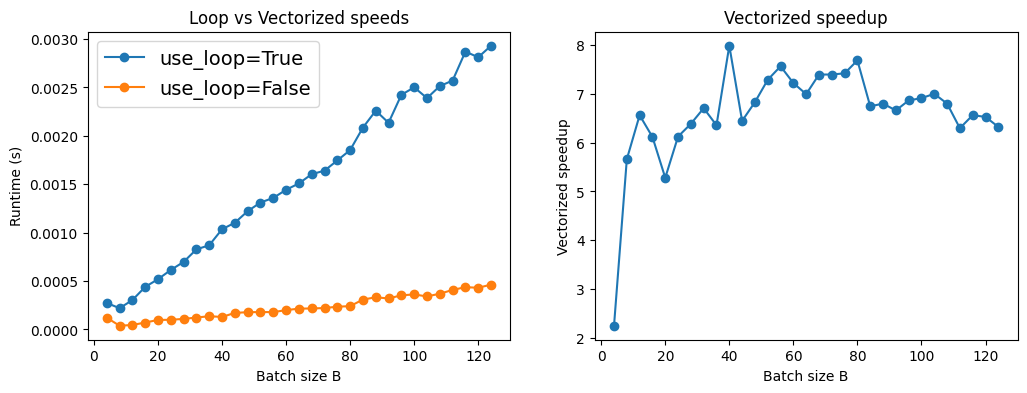

In [68]:
import time
import matplotlib.pyplot as plt
from pytorch101 import batched_matrix_multiply

N, M, P = 64, 64, 64
loop_times = []
no_loop_times = []
no_loop_speedup = []
Bs = list(range(4, 128, 4))
num_trials = 20
for B in Bs:
    loop_trials = []
    no_loop_trials = []
    for trial in range(num_trials):
        x = torch.randn(B, N, M)
        y = torch.randn(B, M, P)
        t0 = time.time()
        z1 = batched_matrix_multiply(x, y, use_loop=True)
        t1 = time.time()
        z2 = batched_matrix_multiply(x, y, use_loop=False)
        t2 = time.time()
        loop_trials.append(t1 - t0)
        no_loop_trials.append(t2 - t1)
    loop_mean = torch.tensor(loop_trials).mean().item()
    no_loop_mean = torch.tensor(no_loop_trials).mean().item()
    loop_times.append(loop_mean)
    no_loop_times.append(no_loop_mean)
    no_loop_speedup.append(loop_mean / no_loop_mean)

plt.subplot(1, 2, 1)
plt.plot(Bs, loop_times, 'o-', label='use_loop=True')
plt.plot(Bs, no_loop_times, 'o-', label='use_loop=False')
plt.xlabel('Batch size B')
plt.ylabel('Runtime (s)')
plt.legend(fontsize=14)
plt.title('Loop vs Vectorized speeds')

plt.subplot(1, 2, 2)
plt.plot(Bs, no_loop_speedup, '-o')
plt.title('Vectorized speedup')
plt.xlabel('Batch size B')
plt.ylabel('Vectorized speedup')

plt.gcf().set_size_inches(12, 4)
plt.show()

## Broadcasting

Broadcasting은 서로 다른 shape을 가진 `tensor`들 사이에서도 산술 연산을 가능하게 해주는 편리한 방법입니다.  
보통은 작은 `tensor`와 큰 `tensor`가 있을 때, 작은 `tensor`를 여러 번 확장해 큰 `tensor`에 연산을 적용하고 싶을 때 사용됩니다.  

예를 들어, 어떤 `tensor`의 각 row에 동일한 상수 벡터를 더하고 싶다고 가정해 봅시다.  
이 경우 다음과 같이 작성할 수 있습니다.

In [69]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


이 방법도 잘 동작은 합니다만, `x`가 아주 클 경우, Python에서 명시적으로 루프를 돌면 느릴 수 있습니다.  
사실 `x`의 각 행에 벡터 `v`를 더하는 것은, `v`를 여러 번 세로로 쌓아 만든 `vv`라는 `tensor`를 만든 다음, `x`와 `vv`를 원소별로 더하는 것과 같습니다.  
이 접근은 다음처럼 구현할 수 있습니다:

In [70]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [71]:
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


PyTorch의 broadcasting을 사용하면 `v`를 여러 번 복사해 만들지 않고도 같은 계산을 수행할 수 있습니다.  
broadcasting을 활용한 버전은 다음과 같습니다:

In [72]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


`y = x + v`라는 한 줄이 동작하는 이유는, `x`의 shape이 (4, 3)이고 `v`의 shape이 (3,)임에도 불구하고 broadcasting이 적용되기 때문입니다.  
이 연산은 마치 `v`가 (4, 3) 모양으로 확장되어 각 행이 `v`의 복사본인 것처럼 작동하며, 원소별 합이 수행됩니다.  

두 `tensor`가 broadcasting될 때는 다음 규칙을 따릅니다:

1. 두 `tensor`의 rank가 다르면, 낮은 rank의 shape 앞에 1을 붙여 길이를 맞춘다.  
2. 특정 차원에서 두 `tensor`의 크기가 같거나, 둘 중 하나가 1이면 두 `tensor`는 그 차원에서 *호환 가능(compatible)* 하다.  
3. 모든 차원에서 호환 가능하다면 두 `tensor`는 함께 broadcasting될 수 있다.  
4. broadcasting된 후 각 `tensor`는 두 입력 `tensor` shape의 원소별 최댓값과 동일한 shape을 가진 것처럼 동작한다.  
5. 어떤 차원에서 한 `tensor`의 크기가 1이고 다른 `tensor`의 크기가 1보다 크다면, 크기가 1인 `tensor`는 그 차원에서 복사된 것처럼 동작한다.  

이 설명이 잘 이해되지 않는다면 [공식 문서](https://pytorch.org/docs/stable/notes/broadcasting.html)의 설명을 참고하세요.  

Broadcasting은 보통 PyTorch 연산자 내부에서 암묵적으로 일어나지만, [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors)를 사용해 명시적으로 수행할 수도 있습니다.  

In [73]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
print('Here is x (before broadcasting):')
print(x)
print('x.shape: ', x.shape)
print('\nHere is v (before broadcasting):')
print(v)
print('v.shape: ', v.shape)

xx, vv = torch.broadcast_tensors(x, v)
print('Here is xx (after) broadcasting):')
print(xx)
print('xx.shape: ', x.shape)
print('\nHere is vv (after broadcasting):')
print(vv)
print('vv.shape: ', vv.shape)

Here is x (before broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
x.shape:  torch.Size([4, 3])

Here is v (before broadcasting):
tensor([1, 0, 1])
v.shape:  torch.Size([3])
Here is xx (after) broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
xx.shape:  torch.Size([4, 3])

Here is vv (after broadcasting):
tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
vv.shape:  torch.Size([4, 3])


broadcasting이 적용된 후에도 `x`는 변하지 않지만, `v`는 shape 앞에 새로운 차원이 추가되고 `x`와 같은 shape을 갖도록 복제됩니다.  
이제 두 `tensor`의 shape가 같아졌으므로 원소별 덧셈을 수행할 수 있습니다.  

모든 원소별(elementwise) 함수들은 broadcasting을 지원합니다.  
일부 원소별이 아닌 함수(예: 선형대수 함수)들도 broadcasting을 지원하며, 특정 함수가 broadcasting을 지원하는지는 문서를 확인해야 합니다.  
예를 들어 [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html)은 broadcasting을 지원하지 않지만, [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html)은 지원합니다.  

broadcasting을 활용하면 다양한 연산을 쉽게 구현할 수 있습니다.  
예를 들어, 벡터의 외적(outer product)을 계산할 수도 있습니다:  

In [74]:
# Compute outer product of vectors
v = torch.tensor([1, 2, 3])  # v has shape (3,)
w = torch.tensor([4, 5])     # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
print(v.view(3, 1) * w)

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])


행렬의 각 행(row)에 벡터를 더할 수도 있습니다.

In [75]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
v = torch.tensor([1, 2, 3])               # v has shape (3,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(v)

# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
print('\nAdd the vector to each row of the matrix:')
print(x + v)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([1, 2, 3])

Add the vector to each row of the matrix:
tensor([[2, 4, 6],
        [5, 7, 9]])


행렬의 각 열(column)에 벡터를 더할 수도 있습니다.

In [76]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


`tensor`에 여러 상수를 곱할 수도 있습니다.

In [77]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


#### 직접 구현하기
`normalize_columns`를 구현하세요.  
이 함수는 행렬의 각 열(column)을 정규화해야 합니다.  
즉, 각 열의 평균(mean)과 표준편차(std)를 구한 뒤, 각 원소에서 평균을 빼고 표준편차로 나눠야 합니다.  

예시:  
```
x = [[ 0,  30,  600],
     [ 1,  10,  200],
     [-1,  20,  400]]
```
- 첫 번째 열의 mean = 0, std = 1  
- 두 번째 열의 mean = 20, std = 10  
- 세 번째 열의 mean = 400, std = 200  

정규화 후 결과는 다음과 같아야 합니다:  
```
y = [[ 0,  1,  1],
     [ 1, -1, -1],
     [-1,  0,  0]]
```

참고: 스칼라 $x_1,\ldots,x_M$에 대해 평균 $\mu$와 표준편차 $\sigma$는 다음과 같이 정의됩니다:

$$\mu=\frac{1}{M}\sum_{i=1}^M x_i \hspace{4pc} \sigma = \sqrt{\frac{1}{M-1}\sum_{i=1}^M(x_i-\mu)^2}$$

In [79]:
from pytorch101 import normalize_columns

x = torch.tensor([[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]])
y = normalize_columns(x)
print('Here is x:')
print(x)
print('Here is y:')
print(y)

x_expected = [[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]]
y_expected = [[0., 1., 1.], [1., -1., -1.], [-1., 0., 0.]]
y_correct = y.tolist() == y_expected
x_correct = x.tolist() == x_expected
print('y correct: ', y_correct)
print('x unchanged: ', x_correct)

Here is x:
tensor([[  0.,  30., 600.],
        [  1.,  10., 200.],
        [ -1.,  20., 400.]])
Here is y:
tensor([[ 0.,  1.,  1.],
        [ 1., -1., -1.],
        [-1.,  0.,  0.]])
y correct:  True
x unchanged:  True


### Out-of-place vs In-place 연산자
PyTorch 연산자는 보통 두 가지로 나눌 수 있습니다:  
- **Out-of-place 연산자:** 새로운 `tensor`를 반환합니다. 대부분의 PyTorch 연산자가 여기에 해당합니다.  
- **In-place 연산자:** 입력 `tensor` 자체를 수정하고 반환합니다. 인스턴스 메서드 이름이 밑줄(`_`)로 끝나면(`add_()` 등) in-place 연산자입니다.  
  또한 `torch` 네임스페이스의 연산자들은 `out=` 키워드 인자를 사용해 in-place 동작을 시킬 수 있습니다.  

예를 들어:  

In [80]:
# Out-of-place addition creates and returns a new tensor without modifying the inputs:
x = torch.tensor([1, 2, 3])
y = torch.tensor([3, 4, 5])
print('Out-of-place addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
z = x.add(y)  # Same as z = x + y or z = torch.add(x, y)
print('\nAfter addition (x and y unchanged):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

# In-place addition modifies the input tensor:
print('\n\nIn-place Addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
x.add_(y)  # Same as x += y or torch.add(x, y, out=x)
print('\nAfter addition (x is modified):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

Out-of-place addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x and y unchanged):
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In-place Addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x is modified):
x:  tensor([4, 6, 8])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


일반적으로 **in-place 연산은 피하는 것이 좋습니다.**  
이는 autograd를 사용해 gradient를 계산할 때 문제를 일으킬 수 있기 때문입니다  
다만 in-place 연산을 하는 경우 memory를 아낄 수 있기 때문에 이를 잘 활용하는 것도 중요합니다.

## Running on GPU

**주의: 이 섹션은 GPU가 필요합니다! CUDA 지원 GPU가 없는 경우, Google Colab에서 이 부분을 실행할 수 있습니다.**

PyTorch의 가장 중요한 기능 중 하나는 GPU(Graphics Processing Unit)를 사용해 `tensor` 연산을 가속할 수 있다는 점입니다.  
PyTorch가 GPU를 사용할 수 있도록 설정되어 있는지 쉽게 확인할 수 있습니다.  
또한 `.to` 메서드를 사용하면 `tensor`를 원하는 장치로 옮길 수 있습니다.  

In [81]:
import torch

if torch.cuda.is_available():
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch cannot use GPUs.


In [82]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu


AssertionError: Torch not compiled with CUDA enabled